In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import QuantLib as ql
%matplotlib inline

In [69]:
dvol_CO6_17_20 = pd.read_csv("CO6_17_20.csv")
dvol_CO6_08_09 = pd.read_csv("CO6_08_09.csv")
dvol_CO6_14_15 = pd.read_csv("CO6_14_15.csv")
dvol_COH1_17_20 = pd.read_csv("COH1_17_20.csv")
dprice_CO6_08_20 = pd.read_csv("CO6.csv")
dprice_COH1P35_1Y = pd.read_csv("COH1P35.csv")

dvol_CO6_08_09['Date'] = pd.to_datetime(dvol_CO6_08_09['Date'])
dvol_CO6_14_15['Date']  = pd.to_datetime(dvol_CO6_14_15['Date'])
dvol_CO6_17_20['Date']  = pd.to_datetime(dvol_CO6_17_20['Date'] )
dvol_COH1_17_20['Date']  = pd.to_datetime(dvol_COH1_17_20['Date'])
dprice_CO6_08_20['Date'] = pd.to_datetime(dprice_CO6_08_20['Date'])
dprice_COH1P35_1Y['Date'] = pd.to_datetime(dprice_COH1P35_1Y['Date'])

dvol_CO6_08_09 =dvol_CO6_08_09.set_index('Date')
dvol_CO6_14_15 =dvol_CO6_14_15.set_index('Date')
dvol_CO6_17_20 =dvol_CO6_17_20.set_index('Date')
dvol_COH1_17_20 =dvol_COH1_17_20.set_index('Date')
dprice_CO6_08_20 = dprice_CO6_08_20.set_index('Date')
dprice_COH1P35_1Y = dprice_COH1P35_1Y.set_index('Date')

,Hist,ATM100,ATM80,ATM60
Date,,,,
2020-08-21,27.566352,36.121,43.788,59.281
2020-08-20,27.379583,36.022,44.017,59.555
2020-08-19,27.911315,36.279,44.458,59.779
2020-08-18,27.942348,36.087,44.984,60.739
2020-08-17,28.447734,36.525,45.185,60.836
...,...,...,...,...
2020-05-08,65.665403,51.590,60.764,60.589
2020-05-07,64.564351,56.863,64.945,64.059
2020-05-06,64.615487,57.332,65.476,66.403


<AxesSubplot:xlabel='Date'>

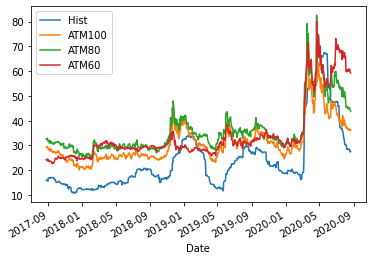

In [68]:
dvol_CO6_17_20.plot()

In [55]:

dvol_CO06_17_20.head()

,Hist,ATM100,ATM80
Date,,,
08/21/20,27.566352,36.121,43.788
08/20/20,27.379583,36.022,44.017
08/19/20,27.911315,36.279,44.458
08/18/20,27.942348,36.087,44.984
08/17/20,28.447734,36.525,45.185
